In [1]:
# Import Libraries
import pandas as pd
import os
import petpy
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

from library.sb_utils import save_file
from library.preprocess import pet_pre_process
from library.preprocess import jlcap_pet_add_cities
from library.preprocess import jlcal_pet_calculate_duration_as_adoptable

In [2]:
cats_df = pd.read_csv('data/cats_2019.csv')
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28176 entries, 0 to 28175
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28176 non-null  int64  
 1   organization_id         28176 non-null  object 
 2   url                     28176 non-null  object 
 3   type                    28176 non-null  object 
 4   species                 28176 non-null  object 
 5   breeds                  28176 non-null  object 
 6   colors                  28176 non-null  object 
 7   age                     28176 non-null  object 
 8   gender                  28176 non-null  object 
 9   size                    28176 non-null  object 
 10  coat                    26408 non-null  object 
 11  attributes              28176 non-null  object 
 12  environment             28176 non-null  object 
 13  tags                    28176 non-null  object 
 14  name                    28176 non-null

In [3]:
cats = pet_pre_process(cats_df)
cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6986 entries, 44360167 to 46431480
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organization_id    6986 non-null   object 
 1   age                6986 non-null   object 
 2   gender             6986 non-null   object 
 3   size               6986 non-null   object 
 4   coat               6742 non-null   object 
 5   status_changed_at  6986 non-null   object 
 6   published_at       6986 non-null   object 
 7   distance           6986 non-null   float64
 8   spayed_neutered    6986 non-null   bool   
 9   house_trained      6986 non-null   bool   
 10  declawed           6986 non-null   bool   
 11  special_needs      6986 non-null   bool   
 12  shots_current      6986 non-null   bool   
 13  breed_primary      6986 non-null   object 
 14  breed_secondary    1475 non-null   object 
 15  breed_mixed        6986 non-null   bool   
 16  breed_unknown

In [4]:
cats.head()

,organization_id,age,gender,size,coat,status_changed_at,published_at,distance,spayed_neutered,house_trained,...,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo
id,,,,,,,,,,,,,,,,,,,,,
44360167,WA470,Baby,Male,Medium,Medium,2019-04-03T17:56:28+0000,2019-04-01T03:54:27+0000,7.5018,False,False,...,False,False,Tabby (Gray / Blue / Silver),None,None,None,None,None,True,False
44360112,WA470,Baby,Male,Medium,Medium,2019-04-11T18:50:52+0000,2019-04-01T03:48:02+0000,7.5018,False,False,...,False,False,Tabby (Gray / Blue / Silver),None,None,None,None,None,True,False
44360038,WA470,Young,Female,Medium,Short,2019-05-02T02:57:33+0000,2019-04-01T03:44:21+0000,7.5018,False,False,...,False,False,Black,None,None,None,None,None,True,False
44359983,WA470,Adult,Female,Medium,Short,2019-07-20T03:58:25+0000,2019-04-01T03:41:28+0000,7.5018,False,False,...,False,False,Tabby (Orange / Red),None,None,None,None,True,True,False
44359955,WA470,Young,Female,Medium,Short,2019-06-21T03:43:01+0000,2019-04-01T03:38:26+0000,7.5018,True,False,...,False,False,Black & White / Tuxedo,None,None,True,True,None,True,False


In [5]:
cats.dtypes

organization_id       object
age                   object
gender                object
size                  object
coat                  object
status_changed_at     object
published_at          object
distance             float64
spayed_neutered         bool
house_trained           bool
declawed                bool
special_needs           bool
shots_current           bool
breed_primary         object
breed_secondary       object
breed_mixed             bool
breed_unknown           bool
color_primary         object
color_secondary       object
color_tertiary        object
goodwith_children     object
goodwith_dogs         object
goodwith_cats         object
hasimage                bool
hasvideo                bool
dtype: object

In [6]:
cats_adoptable = jlcal_pet_calculate_duration_as_adoptable(cats)

count    6965.000000
mean       32.370857
std        63.710503
min         0.000417
25%         3.861100
50%        11.857141
75%        32.900312
max       778.996539
Name: duration_as_adoptable, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


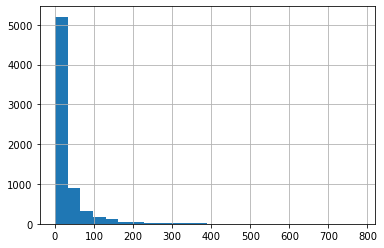

In [7]:
# plot duration column
cats_adoptable['duration_as_adoptable'].hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

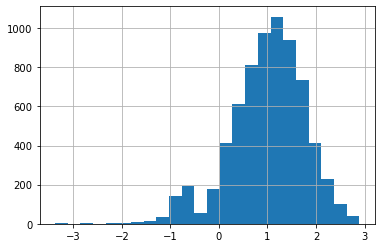

In [8]:
# plot log of duration column

np.log10(cats_adoptable['duration_as_adoptable']).hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

In [9]:
cats_adoptable.shape

(6965, 24)

## Add cities to dataframe, mapped to organization_id

In [10]:
cats_cities = jlcap_pet_add_cities(cats_adoptable)
cats_cities.head()

/Users/jessica/_DS Course/Pet-Adoptions/library/preprocess.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = df['organization_id'].map(city_adopted)
/Users/jessica/_DS Course/Pet-Adoptions/library/preprocess.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['city'], inplace=True)


,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,...,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city
id,,,,,,,,,,,,,,,,,,,,,
44360167,Baby,Male,Medium,Medium,7.5018,False,False,False,False,True,...,Tabby (Gray / Blue / Silver),None,None,None,None,None,True,False,2.584734,Puyallup
44360112,Baby,Male,Medium,Medium,7.5018,False,False,False,False,True,...,Tabby (Gray / Blue / Silver),None,None,None,None,None,True,False,10.626968,Puyallup
44360038,Young,Female,Medium,Short,7.5018,False,False,False,False,True,...,Black,None,None,None,None,None,True,False,30.967500,Puyallup
44359983,Adult,Female,Medium,Short,7.5018,False,False,False,False,True,...,Tabby (Orange / Red),None,None,None,None,True,True,False,110.011771,Puyallup
44359955,Young,Female,Medium,Short,7.5018,True,False,False,False,True,...,Black & White / Tuxedo,None,None,True,True,None,True,False,81.003183,Puyallup


In [11]:
# save the data to a new csv file
datapath = 'data'
save_file(cats_cities, 'cats_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/cats_cleaned.csv"
